In [61]:
import cv2
import os
import numpy as np

In [62]:
os.getcwd()

'/home/data/4DRADAR'

In [72]:
path = './iln/python_src/inference/rimg/origin_32_to_128_sample'
fl_list = os.listdir(path)
fl_list[0]

'output_00000.rimg'

In [65]:
def denoise(range_image): #아랫값 치환 
    ## range_image 입력 --> 노이즈 제거된 range_image 출력
    ## 0인 값 주변의 값으로 변환
    index = np.where(range_image == 0)
    for ch, j in zip(index[0], index[1]) :
        if ch+1 == 32:
            break
        range_image[ch][j] = range_image[ch+1][j]
    
    return range_image

In [66]:
def read_range_image(filename, dtype=np.float16, lidar=None):
    # Read the range image
    range_image_file = open(filename, 'rb') ##
    # 앞에 사이즈 읽기   1. 입력.rimg = np.uint, 2.  출력.rimg = np.uint64
    size = np.fromfile(range_image_file, dtype=np.uint64, count=2) 
    print(size)
    range_image = np.fromfile(range_image_file, dtype=dtype) 
    range_image = range_image.reshape(size[1], size[0]) 

    range_image = range_image.transpose()
    range_image = range_image.astype(np.float32)
    # range_image = np.flip(range_image, axis=0)
    # range_image = np.flip(range_image, axis=1)
    range_image_file.close()
    range_image[range_image==100] = 0
    range_image = denoise(range_image)
    # print(range_image.shape)
    # range_image = outlier_delete(denoise(range_image))

    return range_image

In [67]:
from scipy import io
def read_range_image_mat(filename, dtype=np.float16, lidar=None, param=''):
    # Read the range image
    range_image_file = io.loadmat(filename)
    # 앞에 사이즈 읽기   1. 입력.rimg = np.uint, 2.  출력.rimg = np.uint64
    size = range_image_file[param].shape
    
    range_image = range_image_file[param] 
    range_image = range_image.reshape(size[1], size[0]) 

    range_image = range_image.transpose()
    range_image = range_image.astype(np.float32)
    
    range_image[range_image==100] = 0
    range_image = denoise(range_image)
    

    return range_image

In [68]:
fl_list[0]

'origin_32_to_128_sample'

In [81]:
image = read_range_image('./iln/python_src/rimg_dataset/sample/Lidar_sr_data/32_2048_origin/train/00000.rimg')

[  32 2048]


In [82]:
image.max()

99.4375

In [38]:
filename = './super_resolution_data/Retina_output/Retina_output_1.mat'
range_image_file = io.loadmat(filename)
range_image_file['C_Retina'].shape[0]

256

In [59]:
image = read_range_image_mat(filename, param='C_Zed')

[384 216]


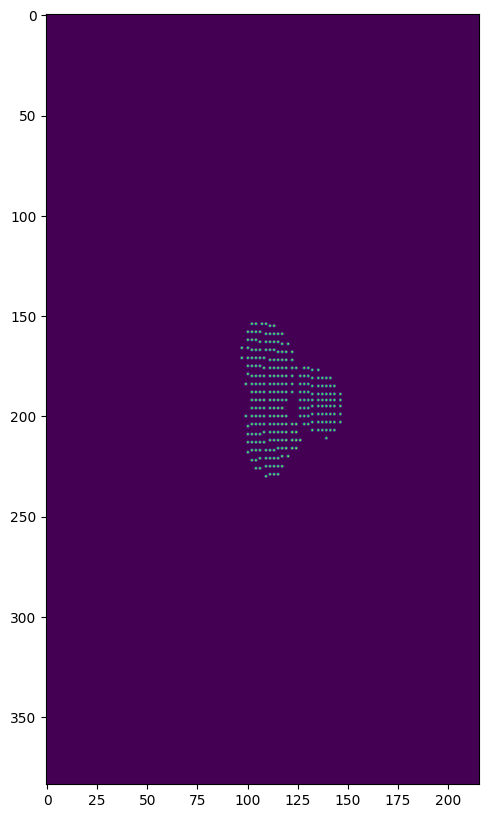

In [105]:
## 원본 입력
image = read_range_image('./iln/python_src/rimg_dataset/4DSR/Lidar_sr_data/384_216_origin/train/Hwi_Retina_56.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)

[1920 1080]


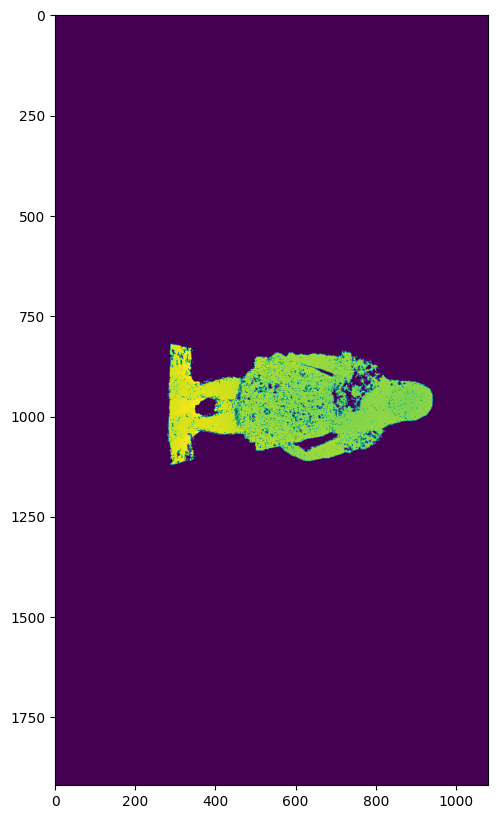

In [107]:
## 원본 입력
image = read_range_image('./iln/python_src/rimg_dataset/4DSR/Lidar_sr_data/1920_1080_origin/train/Hwi_Zed_56.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)

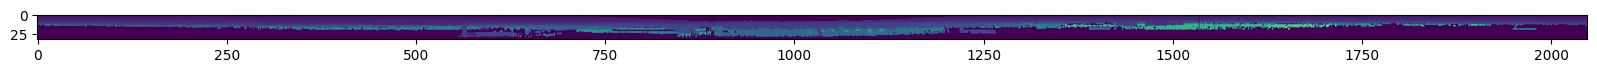

In [92]:
plt.figure(figsize=(20,100))
plt.imshow(image)

[384 216]


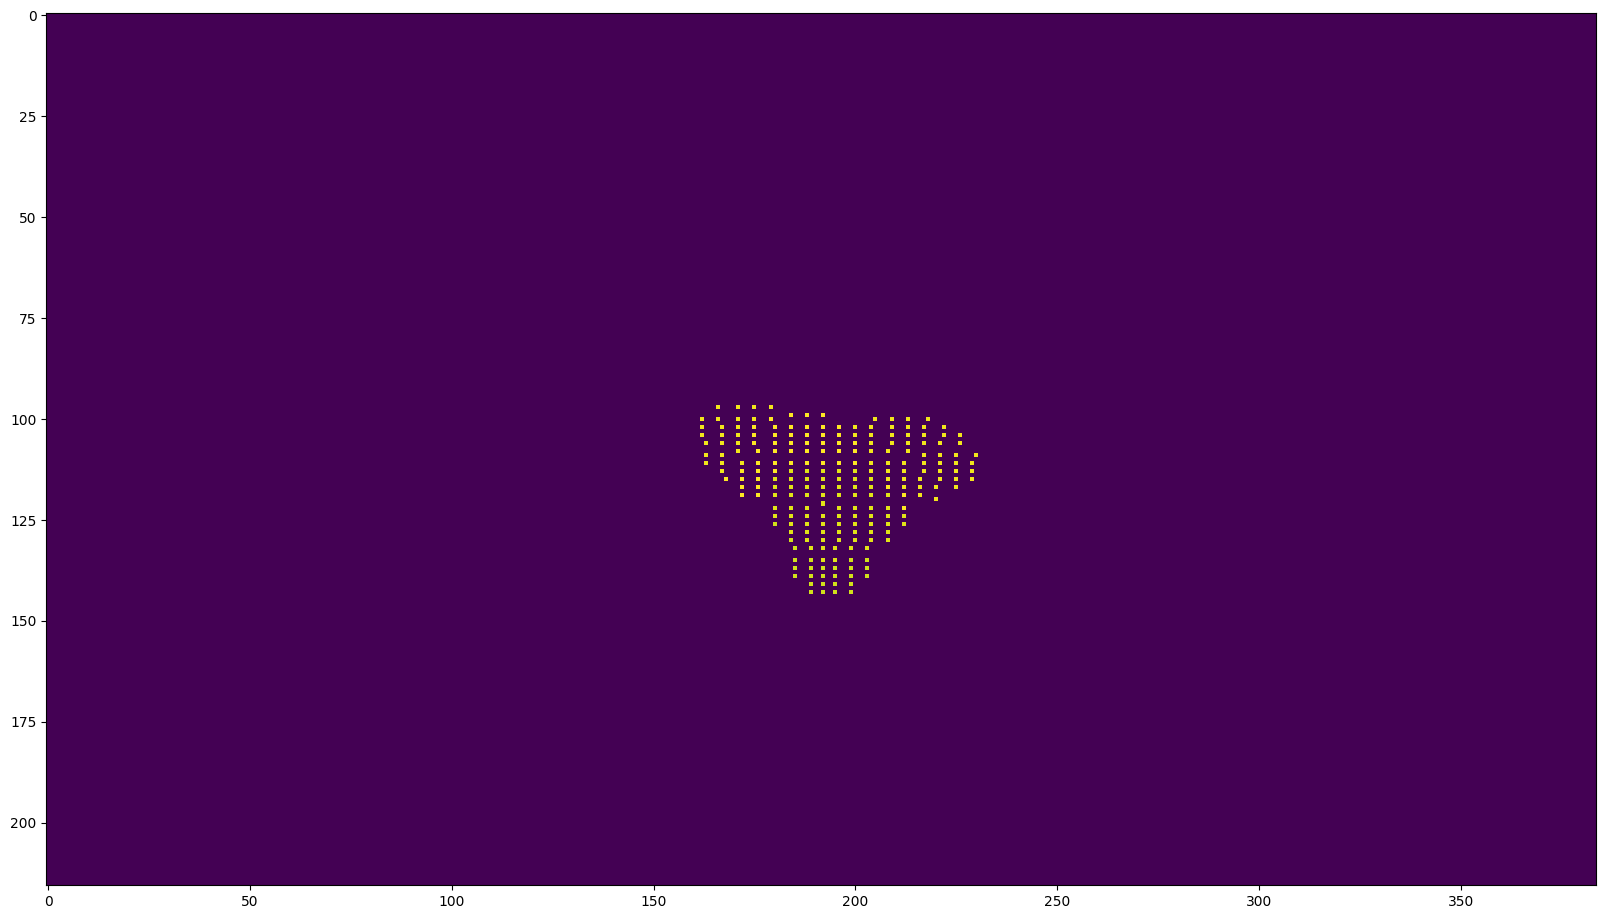

In [115]:
## 훈련 pt
image = read_range_image('./iln/python_src/rimg_dataset/4DSR/Lidar_sr_data/384_216_origin/test/Hwi_Retina_55.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,100))
plt.imshow(image.T)

[1920 1080]


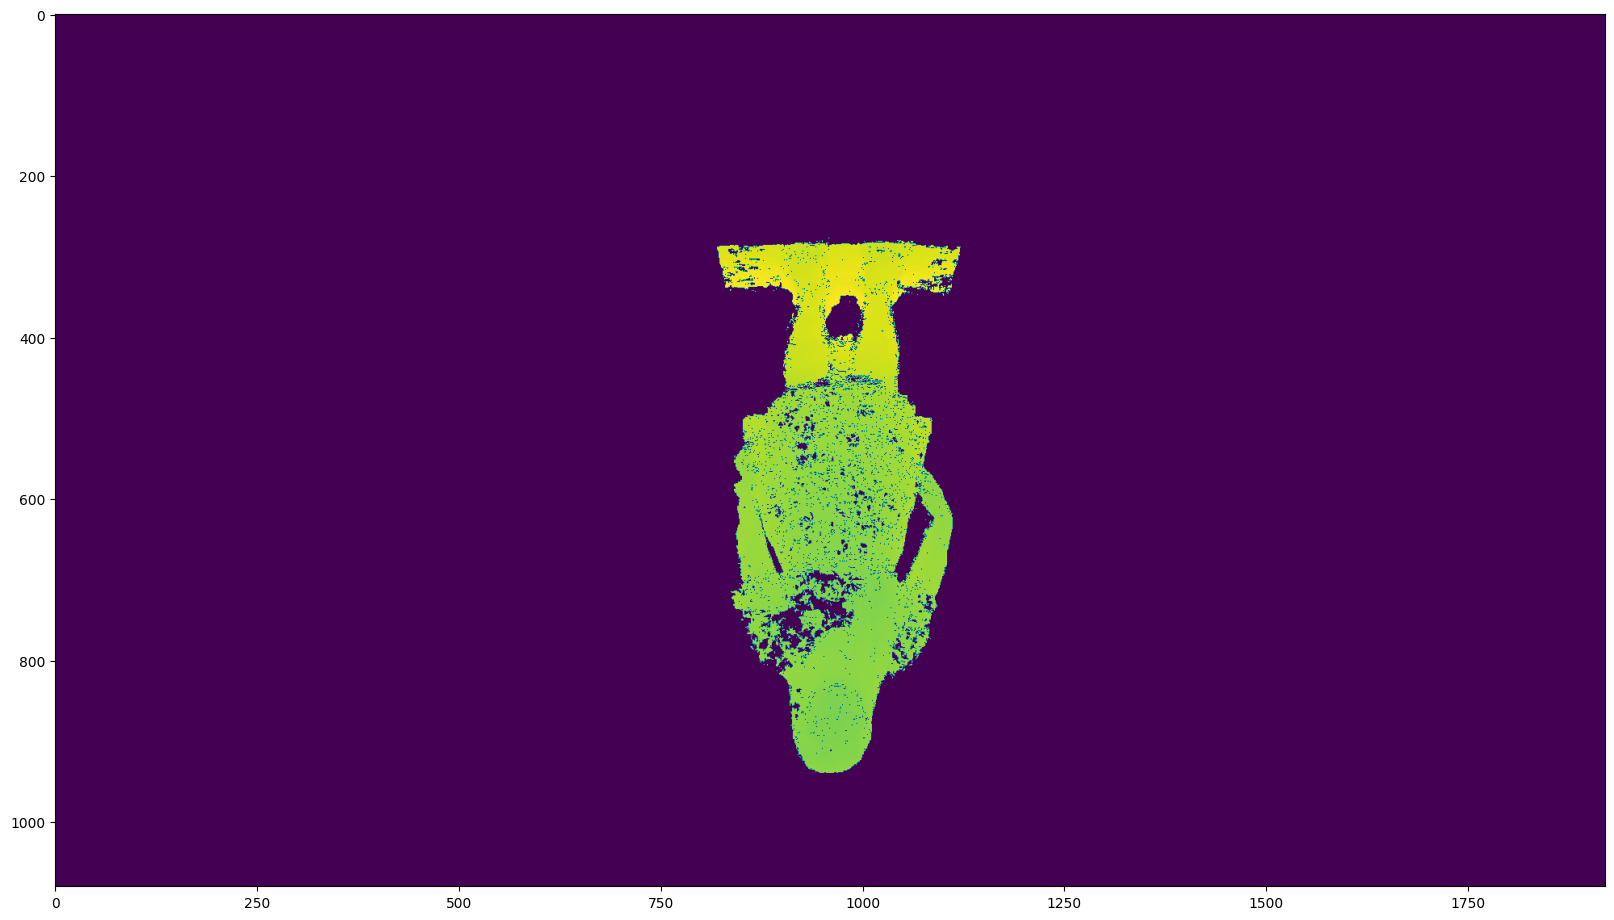

In [116]:
## 훈련 pt
image = read_range_image('./iln/python_src/rimg_dataset/4DSR/Lidar_sr_data/1920_1080_origin/test/Hwi_Zed_55.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,100))
plt.imshow(image.T)

[1080 1920]


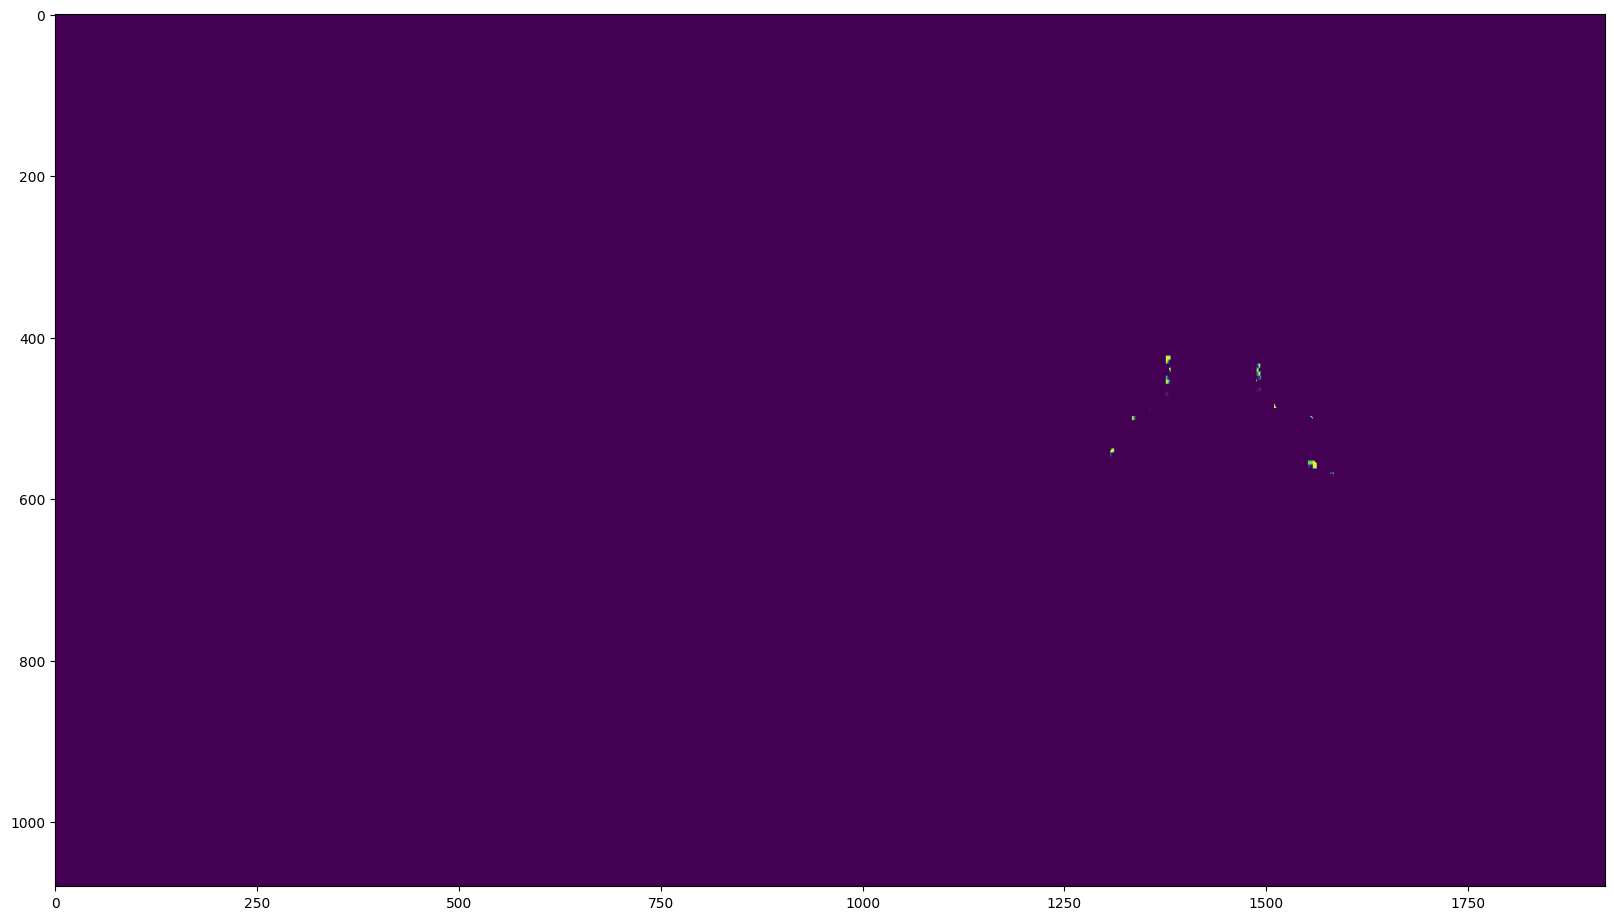

In [117]:
## 훈련 pt
image = read_range_image('./iln/python_src/inference/rimg/origin_retina_384_1920/output_Hwi_Retina_55.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,100))
plt.imshow(image)

[2048  128]


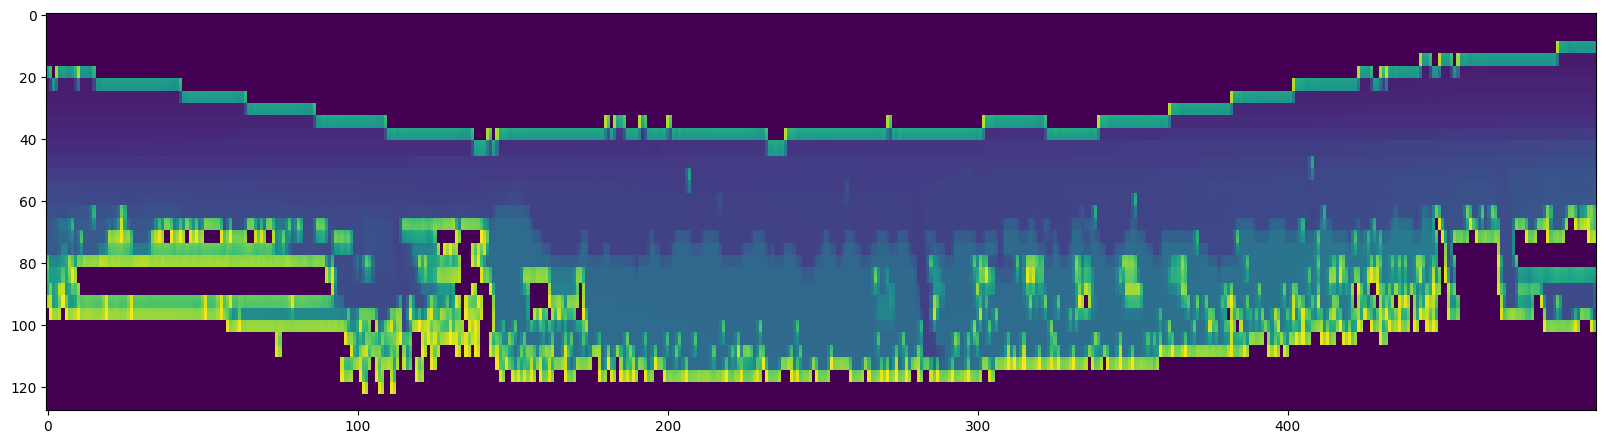

In [94]:
## 사전학습 pt
image = read_range_image('./iln/python_src/inference/rimg/origin_32_to_128_sample3/output_00000.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,100))
plt.imshow(image.T[:,750:1250])

In [56]:
filename = './super_resolution_data/ZED_output/Zed_output_1.mat'
range_image_file = io.loadmat(filename)
range_image_file['C_Zed'].shape[0]

256

In [54]:
image = read_range_image_mat(filename)

KeyError: 'C_Retina'

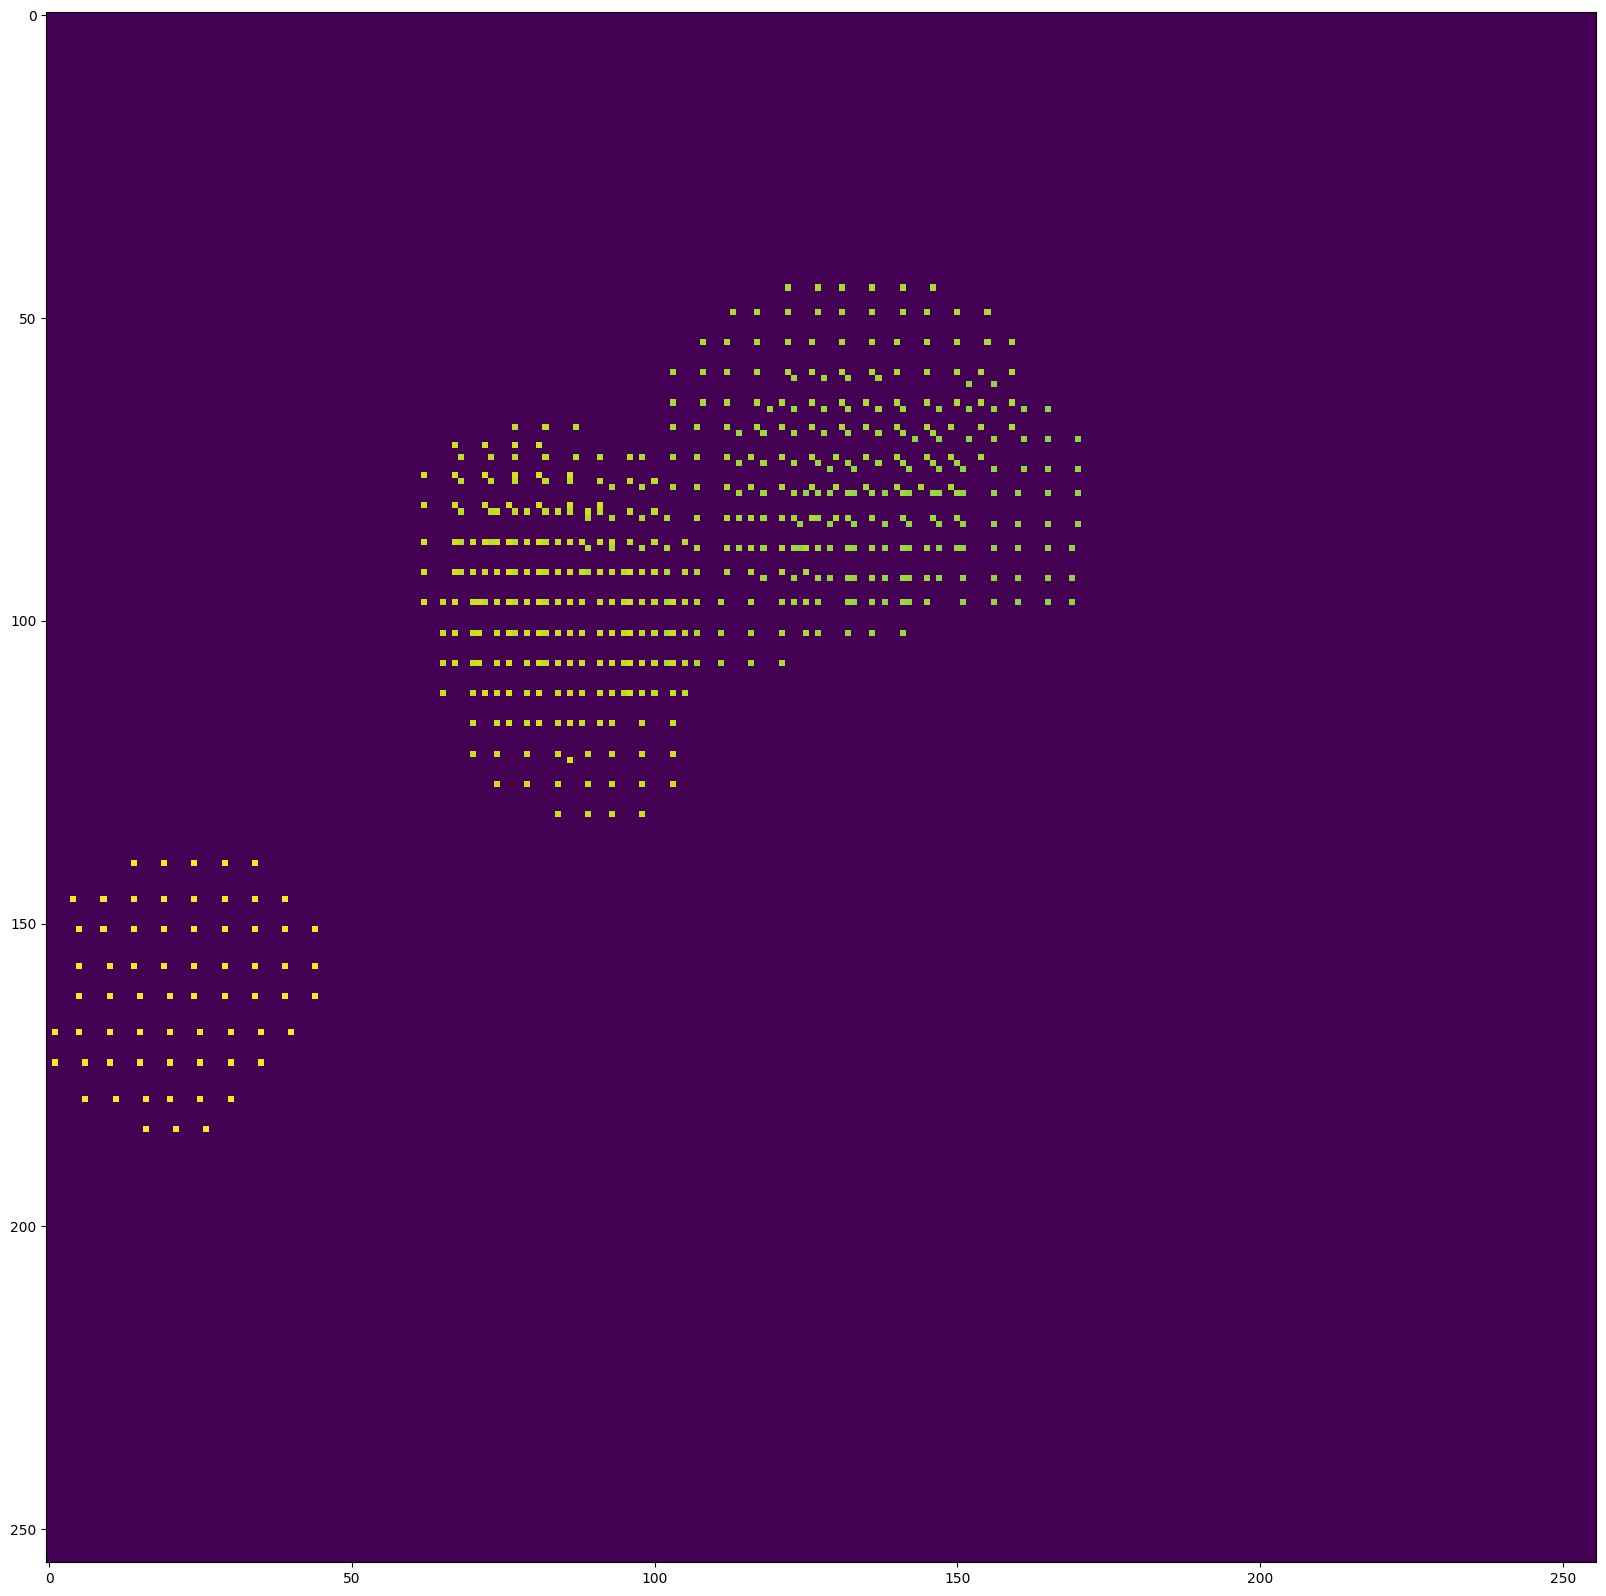

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,100))
plt.imshow(image)

In [32]:
image.max()

0.0

[2048  128]


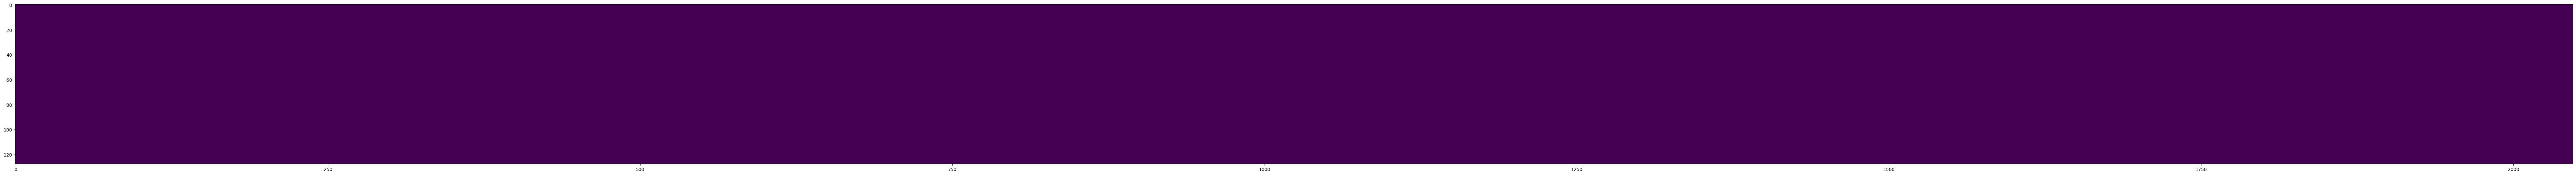

In [76]:
image = read_range_image('./iln/python_src/inference/rimg/origin_32_to_128_sample/output_00000.rimg')
plt.figure(figsize=(100,10))
plt.imshow(image.T)

In [37]:
path = './iln/python_src/rimg_dataset/Custom_2/Lidar_sr_data/128_1024_origin2/train/'
fl_list = os.listdir(path)
fl_list[0]

'34124.rimg'

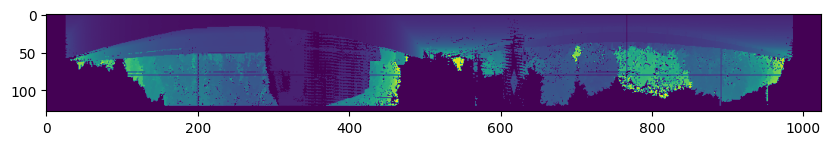

In [42]:
image = read_range_image(path+fl_list[0])
import matplotlib.pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(image)
#plt.colorbar()

In [40]:
image.min()

0.0

In [27]:
path = './iln/python_src/rimg_dataset/Custom_2/Lidar_sr_data/32_1024_downsample2/train/'
fl_list = os.listdir(path)
fl_list[0]

'34124.rimg'

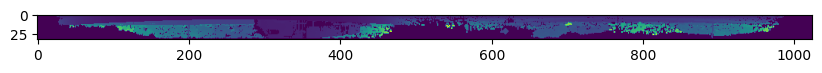

In [28]:
image = read_range_image(path+fl_list[0])
import matplotlib.pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(image)

In [29]:
import open3d as o3d
root_dir = './railSAR_data/data3_Azimuth_느리게/'
pcd = o3d.io.read_point_cloud(root_dir+"point_cloud_PLY_34038653_1242_27-06-2024-18-38-31.ply")
o3d.io.write_point_cloud(root_dir+"point_cloud_PLY_34038653_1242_27.pcd", pcd)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


True

In [34]:
pcd

PointCloud with 2699302 points.

In [43]:
path = './iln/python_src/rimg_dataset/Custom_2/Lidar_sr_data/32_1024_downsample/valid/'
fl_list = os.listdir(path)
fl_list[0]

'00017.rimg'

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.

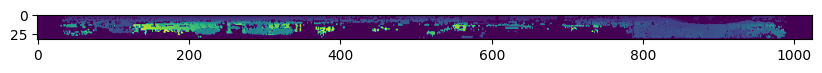

In [44]:
image = read_range_image(path+fl_list[0])
import matplotlib.pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(image)

In [51]:
out_path = './iln/python_src/inference/rimg/origin_32_to_128/'
out_list = os.listdir(out_path)
out_list[0]

'output_00004.rimg'

In [52]:
image.T.shape

(128, 1024)

[ 128 1024]


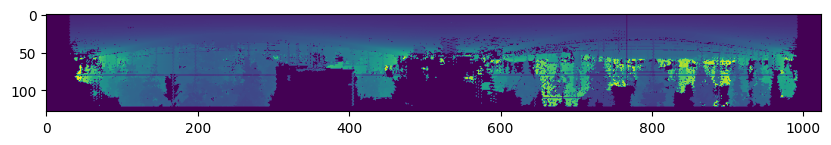

In [101]:
image = read_range_image('./iln/python_src/rimg_dataset/Custom_2/Lidar_sr_data/128_1024_origin/train/00000.rimg')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(image)

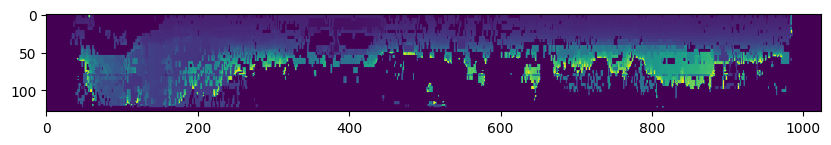

In [54]:
denoise_path = '/data/4DRADAR/super_resolution/iln/python_src/inference/rimg/origin_32_to_128/'
denoise_list = os.listdir(denoise_path)
denoise_list[0]

image = read_range_image(denoise_path+denoise_list[0])
import matplotlib.pyplot as plt
plt.figure(figsize=(10,100))
plt.imshow(image.T)

In [98]:
image.shape

(32, 1024)